<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 11</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 4. Juli, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Michel Vielmetter</font></p>

<p>**Matrikelnummer**: <font color="red">5920493</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Viele Wege führen nach $\pi$</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(3 Punkte)</td></tr></table>

Die **Zahl ${\pi}$** fasziniert die Menschen seit geraumer Zeit. Ihre anschaulichste Bedeutung ist wohl, dass sie das Verhältnis des Flächeninhalts eines Quadrats zu dem eines Kreises mit gleichem Durchmesser wie die Seitenlänge des Quadrats angibt. Analytisch berechnen lässt Sie sich auf verschiedenen Wegen im Prinzip beliebig genau.

Wir wollen in dieser Aufgabe zwei Methoden kennenlernen, mit denen Sie $\pi$ auch dann berechnen könnten, wenn Sie einmal auf einer einsamen Insel stranden, alles über $\pi$ vergessen, aber unbedingt den Flächeninhalt eines Kreises berechnen müssen.

In den Sand zeichnen Sie ein Quadrat und darin einen Kreis. Sie werfen nun **Kieselsteine** in das Quadrat und schauen, wie oft Sie in den Kreis treffen (und wie oft nicht). Angenommen Sie könnten so werfen, dass Sie jeden Ort im Quadrat mit gleicher Wahrscheinlichkeit treffen, so ist es leicht nachzuvollziehen, dass das Verhältnis aus Kieseln im Kreis zu den insgesamt Geworfen proportional zu $\pi$ ist. Berechnen Sie $\pi$ auf diesem Weg.

Für die zweite Methode benötigen Sie keine Kiesel, sondern **Stöcke**. Dieses Experiment geht zurück auf Georges Louis Leclerc, Graf von Buffon. Sie stutzen einen Stock auf die Länge $a$ und zeichnen zwei Linien im Abstand $b$ voneinander in den Sand. Nun werfen Sie den Stock mehrere Male auf dieses Muster und zähle wie oft er auf einer Linie liegt. Leclerc hat dieses Verhältnis zu $2a / (\pi b)$ bestimmt. Schreiben Sie auch für dieses Problem ein Programm. Am einfachsten ist es, wenn Sie $a$ und $b$ gleich 1 setzen.


In [1]:
"""
Wirft steine in ein Quadrat zwischen (-1,-1) und (1,1) und schaut, ob diese innerhalb des Einheitskreises liegen

n ist die Anzahl der geworfenen Steine

es kann ein Seed angegeben werden, fuehr nachvollziehbare ergebnisse
"""
function steineWerfen(n = 10^6; seed = 0)
    hits = 0
    if seed > 0 srand(seed) end
    
    # radius mit pytagoras = x^2 + y^2 = 1
    # also muss x^2 + y^2 <= 1 sein, damit der Stein im Kreis liegt
    #
    # wir waehlen die zufallszahlen im bereich ]0,1] da diese eh quadriert werden,
    # somit muss der negative Bereich nicht betrachtet werden
    
    for i in 1:n if sum(rand(2).^2) <= 1 hits+=1 end end
    hits/n*2^2 #Kantenlaenge 2 des Quadrats muss quadratisch einfliessen
end;

"""
Wirft Stoecke auf ein Muster von 2 Linien um im Verhaeltnis 2a/(πb) Pi zu bestimmen.

n ist die Anzahl der geworfenen Steine

a ist die laenge des Stocks und b ist der abstand der 2 Linien
es kann ein Seed angegeben werden, fuehr nachvollziehbare ergebnisse
"""
function stoeckeWerfen(n = 10^6;a = 1, b = 1, seed = 0)
    hits = 0
    if seed > 0 srand(seed) end
    
    # wir werfen 2 zufallszahlen:
    #    Mittelpunkt des Staebchens (muss in ]0,b] liegen)
    #    Winkel des Staebchens (muss in ]0,180] liegen, da ununterscheidbare Enden)
    # nun wird ein Schnittpunkt mit den Kanten des Systems ]0,b] ermittelt
    # hierfuer ist nur die x komponente von relevanz, da das System in y-Richtung divergiert
    
    for i in 1:n
        throw = rand(2)
        throw[1]*= b
        throw[2] = sind(throw[2]*180)*a/2 # x-komponente des staebchens
        #print(throw)
        if throw[1]-throw[2] <= 0 || throw[1]+throw[2] >= b
            hits += 1
        end
    end
    2a*n/(b*hits)
end;

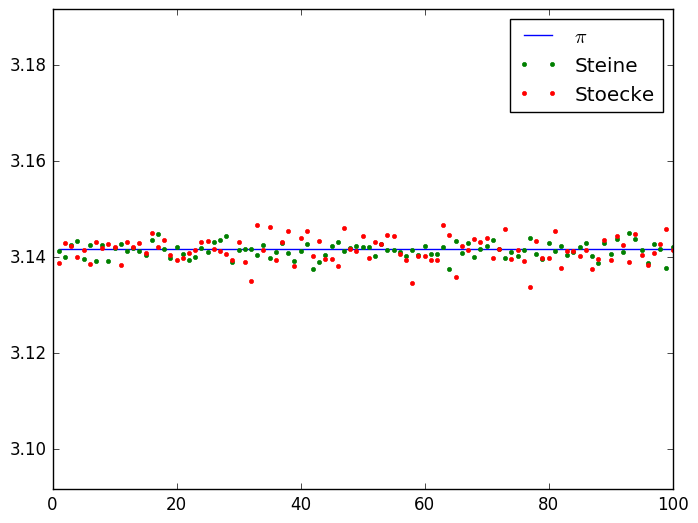

In [2]:
using PyPlot
plot([1;100], [π;π], label=L"$\pi$")
plot(1:100, [steineWerfen() for i=1:100], ".", label="Steine")
plot(1:100, [stoeckeWerfen() for i=1:100], ".", label="Stoecke")
ylim(π-.05, π+.05)
legend();